In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

data = pd.read_csv('train_set.csv', index_col='Id')
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
475,120,RL,41.0,5330,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,251000
696,20,RL,54.0,13811,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,176000
219,50,RL,NaN,15660,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,311500
971,50,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml,135000
187,80,RL,NaN,9947,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal,173000


In [2]:
data.isnull().values.any()

True

In [3]:
data.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       213
LotArea             0
Street              0
Alley            1093
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           29
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       555
GarageType         64
GarageYrBlt        64
GarageFinish       64
GarageCars          0
GarageArea          0
GarageQual         64
GarageCond         64
PavedDrive

In [4]:
data.isnull().sum().sum()

5576

In [5]:
#make a list of the variables that contains missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum()>1]
#print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var,np.round(data[var].isnull().mean(),3), '%missing values')

LotFrontage 0.182 %missing values
Alley 0.936 %missing values
MasVnrType 0.007 %missing values
MasVnrArea 0.007 %missing values
BsmtQual 0.025 %missing values
BsmtCond 0.025 %missing values
BsmtExposure 0.025 %missing values
BsmtFinType1 0.025 %missing values
BsmtFinType2 0.025 %missing values
FireplaceQu 0.475 %missing values
GarageType 0.055 %missing values
GarageYrBlt 0.055 %missing values
GarageFinish 0.055 %missing values
GarageQual 0.055 %missing values
GarageCond 0.055 %missing values
PoolQC 0.995 %missing values
Fence 0.807 %missing values
MiscFeature 0.966 %missing values


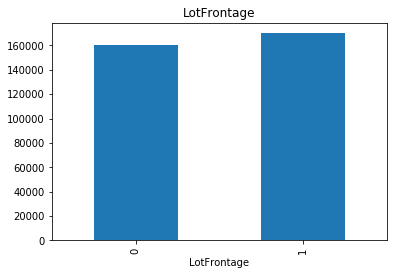

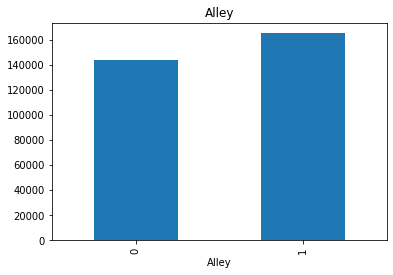

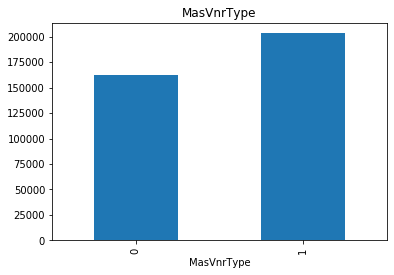

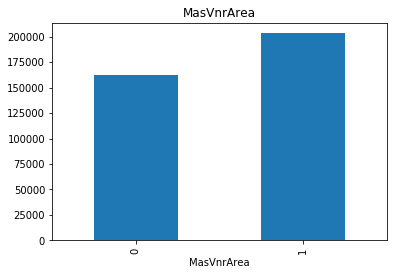

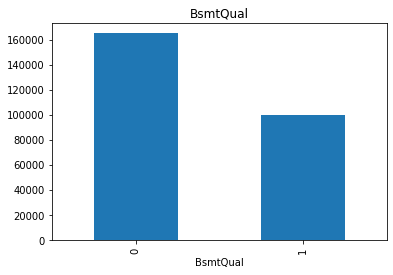

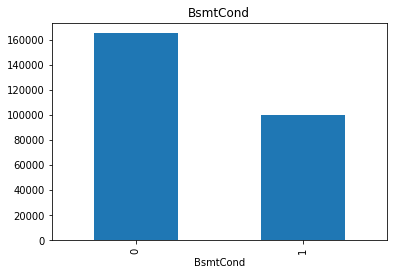

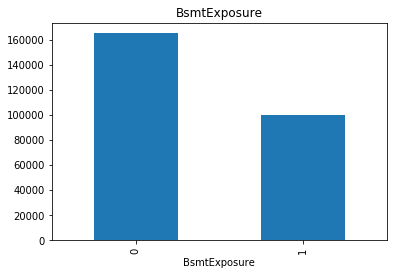

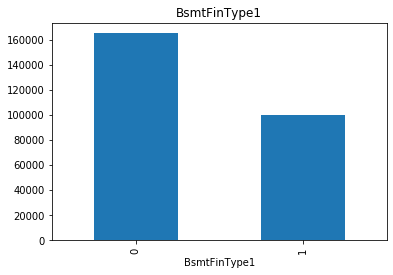

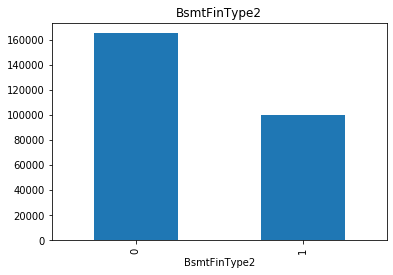

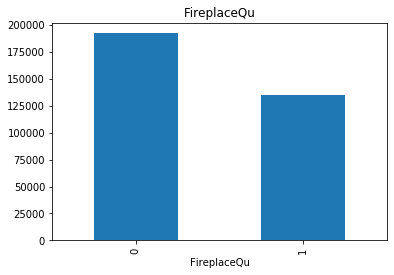

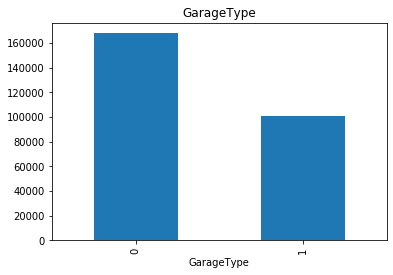

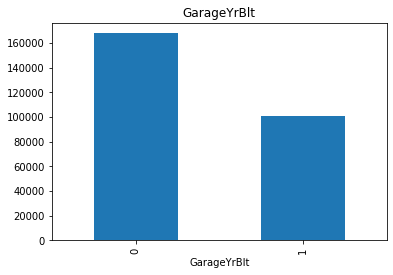

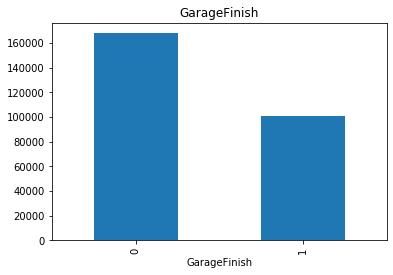

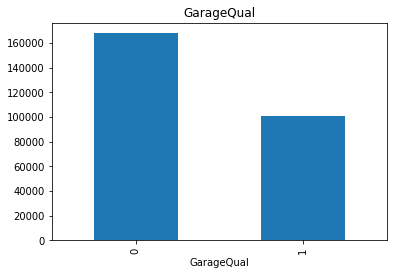

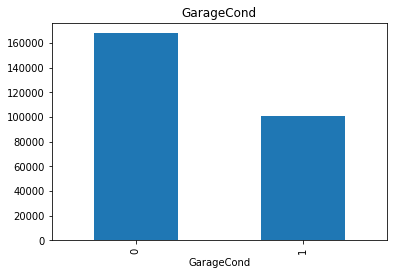

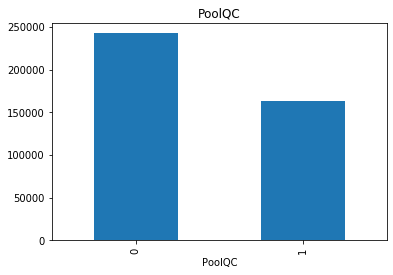

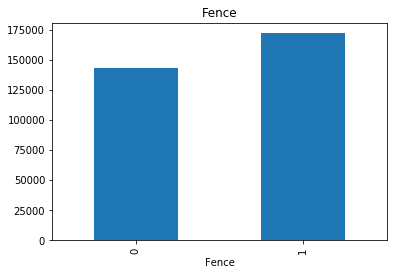

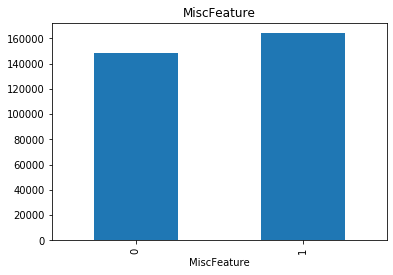

In [6]:
#relationship between values being missing and Sale Price
def analyse_na_value(df,var):
    df = df.copy()
    #let's make a variable that indicates 1 if the observation was missing or zero otherwise
    df[var] = np.where(df[var].isnull(),1,0)
    #lets calculate the mean SalePrice where the info is missing or present
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.show()
for var in vars_with_na:
    analyse_na_value(data,var)

In [7]:
#list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'O']
print('Number of numerical variables:',len(num_vars))

#visualises the numerical variables
data[num_vars].head()

Number of numerical variables: 37


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
475,120,41.0,5330,8,5,2000,2000,0.0,1196,0,...,96,48,0,0,0,0,0,8,2007,251000
696,20,54.0,13811,6,6,1987,1987,72.0,980,40,...,125,0,0,0,0,0,0,7,2006,176000
219,50,NaN,15660,7,9,1939,2006,312.0,341,0,...,0,119,150,0,0,0,0,5,2008,311500
971,50,60.0,10800,4,4,1949,1950,0.0,0,0,...,0,0,0,0,0,0,0,12,2006,135000
187,80,NaN,9947,7,5,1990,1991,0.0,611,0,...,168,27,0,0,0,0,0,6,2009,173000


In [8]:
#print('Number of House id labels:',len(data.id.unique()))
print('Number of houses in the dataset:',len(data))

Number of houses in the dataset: 1168


In [9]:
#list of variables thqt contain year information
year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]
year_vars


['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [10]:
#lets  explore the content of these year variables
for var in year_vars:
    print(var,data[var].unique())
    print()

YearBuilt [2000 1987 1939 1949 1990 1954 1966 1965 2005 1993 2002 1998 1950 2006
 1975 1924 1955 2003 1925 1976 1963 2001 1958 2008 1918 1935 1951 2007
 1960 1973 1915 1970 1914 2004 1920 1910 1982 1988 1995 1928 1926 1985
 1999 1921 1977 1936 1885 1971 1961 1959 1968 1945 1941 1962 1992 1900
 1908 1972 1994 1957 1986 1974 1892 1940 1916 1956 1929 1967 1997 1983
 1979 1922 1942 1937 1934 1969 1930 1984 1931 1875 1932 1947 1964 1946
 1953 1996 1978 1948 1991 1938 1952 1880 1898 1912 1905 2010 1882 1923
 1981 2009 1989 1980 1927 1893 1906 1890 1919 1917 1911 1904]

YearRemodAdd [2000 1987 2006 1950 1991 1972 1966 1988 1965 2007 1995 1954 2003 1999
 2005 2001 1975 1955 2004 1976 1963 1958 2009 1997 1960 1973 1970 2002
 1982 1985 1971 1959 1993 1962 1992 1994 1957 1986 1998 1956 1968 1967
 2008 1983 1979 1974 1980 1969 1977 1996 1953 1990 1964 1952 1981 1978
 2010 1961 1984 1989 1951]

GarageYrBlt [2000. 1987. 1939.   nan 1990. 1958. 1966. 1965. 2005. 1993. 1954. 2002.
 1998. 1950. 2007. 1

In [11]:
median = data['LotFrontage'].median()
data['LotFrontage'].fillna(median, inplace=True)


In [12]:
 #data1 = data.dropna(axis='columns')
category = ["SaleCondition","SaleType","MiscFeature","Fence","PoolQC","PavedDrive","GarageCond","GarageQual","GarageFinish","GarageType","FireplaceQu","Functional","KitchenQual","Electrical","HeatingQC","Heating","BsmtFinType2","BsmtFinType1","BsmtExposure","BsmtCond","BsmtQual","Foundation","ExterCond","ExterQual","MasVnrType","Exterior2nd","Exterior1st","RoofMatl","RoofStyle","HouseStyle","BldgType","Condition2","Condition1","Neighborhood","LandSlope","LotConfig","Utilities","LandContour","LotShape","Alley","MSZoning","MSSubClass"]
data = pd.get_dummies(data,columns=category)



In [13]:
data.head(10)


,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
Id,,,,,,,,,,,,,,,,,,,,,
475,41.0,5330,Pave,8,5,2000,2000,0.0,1196,0,...,0,0,0,0,0,0,1,0,0,0
696,54.0,13811,Pave,6,6,1987,1987,72.0,980,40,...,0,0,0,0,0,0,0,0,0,0
219,68.0,15660,Pave,7,9,1939,2006,312.0,341,0,...,0,0,0,0,0,0,0,0,0,0
971,60.0,10800,Pave,4,4,1949,1950,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
187,68.0,9947,Pave,7,5,1990,1991,0.0,611,0,...,0,0,0,1,0,0,0,0,0,0
724,60.0,8172,Pave,4,6,1954,1972,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
129,69.0,7590,Pave,6,5,1966,1966,266.0,512,0,...,1,0,0,0,0,0,0,0,0,0
1155,68.0,13700,Pave,7,6,1965,1988,288.0,454,0,...,1,0,0,0,0,0,0,0,0,0
1460,75.0,9937,Pave,5,6,1965,1965,0.0,830,290,...,0,0,0,0,0,0,0,0,0,0


In [14]:
encoding= ['Street','CentralAir']
enc = LabelEncoder()
for x in encoding:
    data[x]= enc.fit_transform(data[x])


In [15]:
data.head()

,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
Id,,,,,,,,,,,,,,,,,,,,,
475,41.0,5330,1,8,5,2000,2000,0.0,1196,0,...,0,0,0,0,0,0,1,0,0,0
696,54.0,13811,1,6,6,1987,1987,72.0,980,40,...,0,0,0,0,0,0,0,0,0,0
219,68.0,15660,1,7,9,1939,2006,312.0,341,0,...,0,0,0,0,0,0,0,0,0,0
971,60.0,10800,1,4,4,1949,1950,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
187,68.0,9947,1,7,5,1990,1991,0.0,611,0,...,0,0,0,1,0,0,0,0,0,0
